In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('household_power_consumption.txt', delimiter=';')
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
power_consumption = data.iloc[0:, 2:9].dropna()
power_consumption.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
pc_toarray = power_consumption.values
pc_toarray

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ..., 
       [0.938, 0.0, 239.82, ..., 0.0, 0.0, 0.0],
       [0.934, 0.0, 239.7, ..., 0.0, 0.0, 0.0],
       [0.932, 0.0, 239.55, ..., 0.0, 0.0, 0.0]], dtype=object)

In [6]:
hpc_fit, hpc_fit1 = train_test_split(pc_toarray, train_size=.01)

In [7]:
power_consumption.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
data.shape

(2075259, 9)

In [9]:
power_consumption.shape

(2049280, 7)

In [10]:
hpc_fit.shape

(20492, 7)

In [11]:
hpc_fit1.shape

(2028788, 7)

In [12]:
hpc_fit1.shape[0]+hpc_fit.shape[0]

2049280

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [16]:
hpc = PCA(n_components=7).fit(pc_toarray)
hpc

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
#Cumulative Variance explains
var1=np.cumsum(np.round(hpc.explained_variance_ratio_, decimals=4)*100)
var1

array([  49.4 ,   73.1 ,   92.28,   97.52,   99.99,  100.  ,  100.  ])

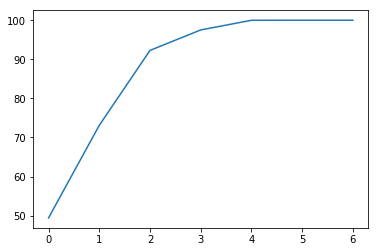

In [19]:
%matplotlib inline
plt.plot(var1)

In [20]:
hpc = PCA(n_components=2).fit_transform(hpc_fit)
hpc

array([[ 12.28949756,  -4.42240598],
       [ 17.87954394,   8.89839468],
       [ 12.11805295,  -3.28771779],
       ..., 
       [ -6.2964719 ,   0.0756662 ],
       [ -8.00411163,  -0.04373284],
       [ -7.34867408,   0.40738822]])

In [21]:
hpc.shape

(20492, 2)

In [22]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

In [23]:
# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(hpc) for k in k_range]
k_means_var

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [40]:
# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]
centroids

[array([[ -1.71508588e-13,  -1.22176601e-13]]),
 array([[ -6.27862402,   1.3167171 ],
        [ 11.96348053,  -2.50891267]]),
 array([[ -6.58207163,   0.66743271],
        [ 10.99643404,  -4.86133724],
        [ 16.65989669,  25.40332971]]),
 array([[ 10.86932246,  -5.06425769],
        [ -6.61704713,   0.61514826],
        [ 17.92657799,  31.28052998],
        [ 13.7877764 ,  12.68434594]]),
 array([[ -6.60774792,   0.62760631],
        [ 10.84859325,  -5.08199601],
        [  5.62123545,  26.02342765],
        [ 24.38912492,  30.0724434 ],
        [ 19.8819593 ,   9.74552509]]),
 array([[ 10.85102397,  -5.07705505],
        [ -6.64963785,   0.5675766 ],
        [  8.16935403,  34.61013034],
        [ 25.11191641,  28.71161828],
        [ 20.0727058 ,   9.80062054],
        [  2.63788894,  14.61450462]]),
 array([[ 10.54729988,  -4.97973967],
        [ -6.65252016,   0.56784962],
        [ 25.11191641,  28.71161828],
        [ 19.97614816,   9.86334099],
        [  2.61362516,  14.591

In [41]:
len(centroids)

13

In [42]:
centroids[1]

array([[ -6.27862402,   1.3167171 ],
       [ 11.96348053,  -2.50891267]])

In [43]:
# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
k_euclid[1]

array([[ 19.43483143,   1.94106768],
       [ 25.31993116,  12.85015436],
       [ 18.96413837,   0.79399625],
       ..., 
       [  1.24117923,  18.4419606 ],
       [  2.19730097,  20.11919105],
       [  1.40423863,  19.53110664]])

In [46]:
# 12.28949756,  -4.42240598
# 11.96348053,  -2.50891267

np.sqrt((12.28949756-(-6.27862402))**2+(-4.42240598-(1.3167171))**2)

19.434831430631203

In [45]:
# 12.28949756,  -4.42240598
# -6.27862402,   1.3167171

np.sqrt((12.28949756-(11.96348053))**2+(-4.42240598-(-2.50891267))**2)

1.9410676833291454

In [30]:
k_euclid[3]

array([[  1.55848353,  19.56615407,  36.14521147,  17.17223924],
       [ 15.62366366,  25.85914046,  22.38218472,   5.57458415],
       [  2.1715022 ,  19.13730228,  35.05285605,  16.05910322],
       ..., 
       [ 17.91879777,   0.62754233,  39.50316024,  23.71404298],
       [ 19.52977686,   1.53560159,  40.66460507,  25.23668706],
       [ 19.02194277,   0.76055389,  39.89973996,  24.44326553]])

In [47]:
dist = [np.min(ke,axis=1) for ke in k_euclid]
dist[1]

array([  1.94106768,  12.85015436,   0.79399625, ...,   1.24117923,
         2.19730097,   1.40423863])

In [32]:
k_euclid[0:3]

[array([[ 13.06098866],
        [ 19.97146763],
        [ 12.55612581],
        ..., 
        [  6.29692653],
        [  8.00423111],
        [  7.3599576 ]]), array([[ 19.43483143,   1.94106768],
        [ 25.31993116,  12.85015436],
        [ 18.96413837,   0.79399625],
        ..., 
        [  1.24117923,  18.4419606 ],
        [  2.19730097,  20.11919105],
        [  1.40423863,  19.53110664]]), array([[ 19.54590958,   1.36553064,  30.1442349 ],
        [ 25.80928846,  15.38529897,  16.54993716],
        [ 19.11381371,   1.93243555,  29.04831409],
        ..., 
        [  0.65708052,  17.98384271,  34.18311568],
        [  1.58995415,  19.60178686,  35.43820395],
        [  0.80950753,  19.08670898,  34.65845584]])]

In [33]:
dist[0:3]

[array([ 13.06098866,  19.97146763,  12.55612581, ...,   6.29692653,
          8.00423111,   7.3599576 ]),
 array([  1.94106768,  12.85015436,   0.79399625, ...,   1.24117923,
          2.19730097,   1.40423863]),
 array([  1.36553064,  15.38529897,   1.93243555, ...,   0.65708052,
          1.58995415,   0.80950753])]

In [48]:
# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]
wcss

[2630479.4657188435,
 1023543.4559155359,
 291206.27877718094,
 216645.09016590577,
 166891.48920574872,
 130383.94399890253,
 108896.90362519113,
 90045.499019503404,
 76207.998716532486,
 62110.162071539955,
 48382.269566371295,
 44190.348716810084,
 40014.74767701338]

In [49]:
# The total sum of squares
tss = sum(pdist(hpc)**2)/(hpc.shape[0])
tss

2630479.4657173832

In [52]:
pdist(hpc)

array([ 14.44618803,   1.14756723,  19.69600744, ...,   1.71180887,
         1.10325379,   0.79568122])

In [53]:
hpc[0:10]

array([[ 12.28949756,  -4.42240598],
       [ 17.87954394,   8.89839468],
       [ 12.11805295,  -3.28771779],
       [ -6.98611253,  -0.37474434],
       [ 14.68818436,  -2.21203246],
       [ -7.51892403,   0.28114099],
       [  7.30226983,  32.93687873],
       [ -6.45919906,   0.50690379],
       [ -6.01412263,   1.27929665],
       [ -5.9895549 ,   0.32495339]])

In [54]:
np.sqrt((12.28949756-(17.87954394))**2+(-4.42240598-(8.89839468))**2)

14.44618803539562

In [56]:
np.sqrt((12.28949756-(12.11805295))**2+(-4.42240598-(-3.28771779))**2)

1.1475672280191378

In [57]:
# The between-cluster sum of squares
bss = tss - wcss
bss

array([ -1.46031380e-06,   1.60693601e+06,   2.33927319e+06,
         2.41383438e+06,   2.46358798e+06,   2.50009552e+06,
         2.52158256e+06,   2.54043397e+06,   2.55427147e+06,
         2.56836930e+06,   2.58209720e+06,   2.58628912e+06,
         2.59046472e+06])

In [58]:
tss

2630479.4657173832

In [59]:
wcss

[2630479.4657188435,
 1023543.4559155359,
 291206.27877718094,
 216645.09016590577,
 166891.48920574872,
 130383.94399890253,
 108896.90362519113,
 90045.499019503404,
 76207.998716532486,
 62110.162071539955,
 48382.269566371295,
 44190.348716810084,
 40014.74767701338]

In [61]:
tss-wcss[0]

-1.4603137969970703e-06

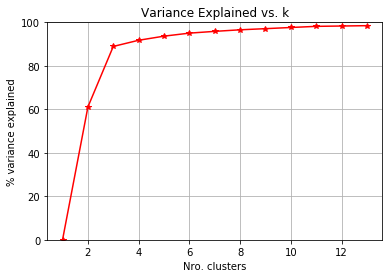

In [62]:
# elbow curve
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'r*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Nro. clusters')
plt.ylabel('% variance explained')
plt.title('Variance Explained vs. k')

### Cluster jerárquico

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [71]:
data_dist = pdist(hpc) # computing the distance
data_link = linkage(data_dist) # computing the linkage

In [72]:
data_dist

array([ 14.44618803,   1.14756723,  19.69600744, ...,   1.71180887,
         1.10325379,   0.79568122])

In [73]:
data_link

array([[  9.84000000e+03,   1.62220000e+04,   0.00000000e+00,
          2.00000000e+00],
       [  1.36400000e+03,   3.78200000e+03,   0.00000000e+00,
          2.00000000e+00],
       [  4.34500000e+03,   2.04930000e+04,   0.00000000e+00,
          3.00000000e+00],
       ..., 
       [  4.07870000e+04,   4.09790000e+04,   6.57910985e+00,
          2.04890000e+04],
       [  8.85200000e+03,   4.09800000e+04,   8.11734180e+00,
          2.04900000e+04],
       [  4.09620000e+04,   4.09810000e+04,   1.14952092e+01,
          2.04920000e+04]])

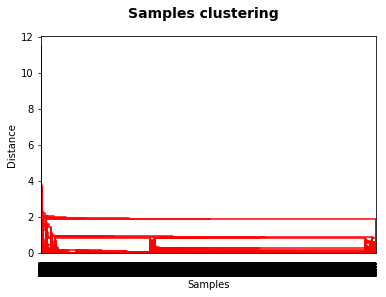

In [74]:
%matplotlib inline

dendrogram(data_link,labels=hpc.dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);